In [115]:
import time
import numpy as np 
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By

import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud, ImageColorGenerator
from konlpy.tag import Okt
import re, nltk

from PIL import Image


plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


import os
driver_name = os.environ['HOMEDRIVE'] + os.environ['HOMEPATH'] + '\\downloads\\chromedriver.exe'



In [90]:
# 네이버 스포츠 랭킹 URL
naver_url = 'https://sports.news.naver.com/ranking/index.nhn?date='

In [91]:
# 테스트 해 보기  
# 테그 CSS Selector 방법1
today =  datetime.now() # 오늘 날짜
day_count = 20   # 몇 일을 가져올 것인지

count = 0
driver = webdriver.Chrome(driver_name)

sports = []

while True:     # 가져올 날짜 수 대로
    get_day = today.strftime('%Y%m%d')

    # 네이버 스포츠 랭킹 URL
    url = naver_url + get_day
    driver.get(url)
    time.sleep(2)

    # 제목가져오기 1
    titles = driver.find_elements(By.CSS_SELECTOR, '#_newsList > ul > li > .text > a > span ')
    
    for title in titles:
        sports.append(title.text.strip())        

    if count >= day_count: break

    today = today - timedelta(1) # 1 day 씩 뺀다.
    count += 1
    
driver.close()  

In [92]:
# 테스트 해 보기  
# 테그 CSS Selector 방법2
today =  datetime.now() # 오늘 날짜
day_count = 20   # 몇 일을 가져올 것인지

count = 0
driver = webdriver.Chrome(driver_name)

sports = []

while True:     # 가져올 날짜 수 
    get_day = today.strftime('%Y%m%d')

    # 네이버 스포츠 랭킹 URL
    url = naver_url + get_day
    driver.get(url)
    time.sleep(2)

    # 제목가져오기 2
    news = driver.find_element(By.CSS_SELECTOR, '#_newsList')
    titles = news.find_elements(By.CLASS_NAME, 'title')
    
    for title in titles:
        sports.append(title.text.strip())        

    if count >= day_count: break

    today = today - timedelta(1) # 1 day 씩 뺀다.
    count += 1
    
driver.close()  

- CSS_SELECTOR 로 한 번에 가져오는 것이 더 속도가 좋은 것 같다.

#### 1. 네이버 스포츠 랭킹으로 가져오기
- 날짜순으로 거꾸로

In [93]:
today =  datetime.now() # 오늘 날짜
day_count = 20  # 가져올 날짜 수 

count = 0
driver = webdriver.Chrome(driver_name)

sports = []

while True:     
    get_day = today.strftime('%Y%m%d')

    # 네이버 스포츠 랭킹 URL
    url = naver_url + get_day
    driver.get(url)
    time.sleep(2)

    # 제목가져오기
    titles = driver.find_elements(By.CSS_SELECTOR, '#_newsList > ul > li > .text > a > span ')
    
    for title in titles:
        sports.append(title.text.strip())        

    if count >= day_count: break

    today = today - timedelta(1) # 1 day 씩 뺀다.
    count += 1
    
driver.close()  


In [94]:
len(sports)

420

In [95]:
text = ' '.join(sports)

In [96]:
text[:200]

'\'메시 드리블\' 전부터 원했다...이강인, \'ATM 13년차\' 감독 직접 영입 승인 "김민재 군사훈련, 나폴리엔 희소식"…현지 매체 \'KIM, 군대 가\' 외치는 이유는? 클린스만에 떨어진 과제... \'기초군사훈련→6월 소집 희박\' 김민재 대체자를 찾아라 그리즈만+이강인 \'꿈의 조합\' 만든다…\'알레띠\' 바이아웃 승인 "기본적인 수비도 안 된다", "자기 손 '

In [97]:
okt = Okt()
tokens = okt.nouns(text)
tokens[:4]

['메시', '드리블', '전', '이강인']

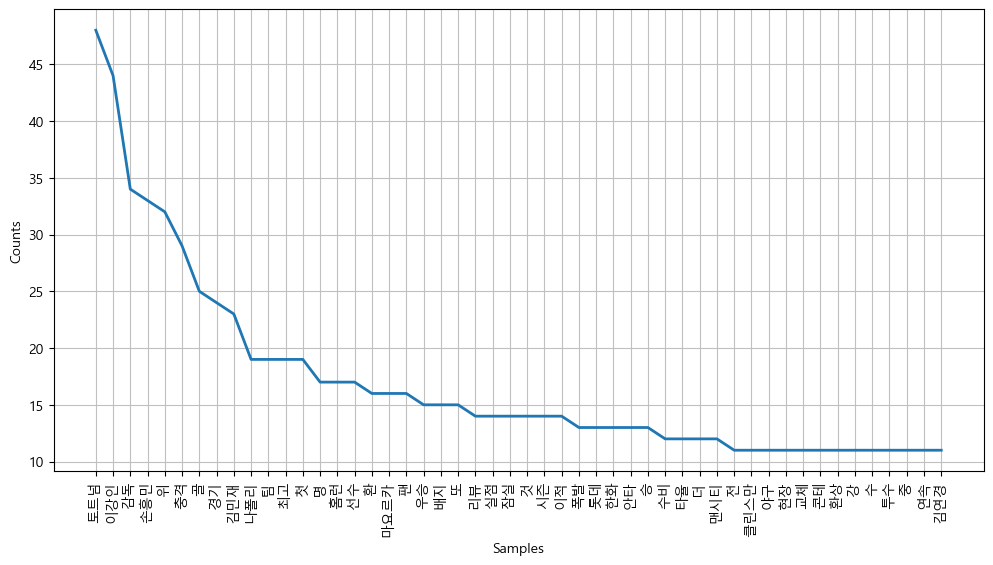

In [98]:
gift = nltk.Text(tokens, name='Sports뉴스')
plt.figure(figsize=(12, 6))
gift.plot(50);

In [99]:
new_tokens = [word for word in tokens]

In [100]:
stoptext="""
    감독 위 첫 명 팀 선수 환 또 리뷰 것 승 투수 수 더 강 중 전 
    팬 세 이 최 패 설 점 행
"""

stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['메시', '드리블', '이강인', '직접', '입', '승인', '김민재', '군사훈련', '나폴리', '희소식']

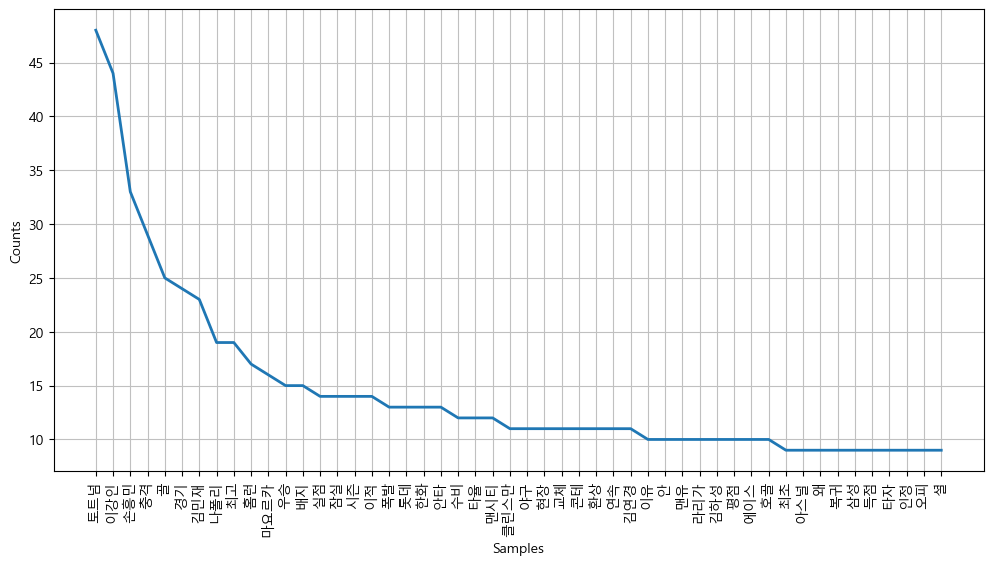

In [101]:
news = nltk.Text(new_tokens, name='Sports뉴스')
plt.figure(figsize=(12, 6))
news.plot(50);

In [102]:
len(new_tokens)

3534

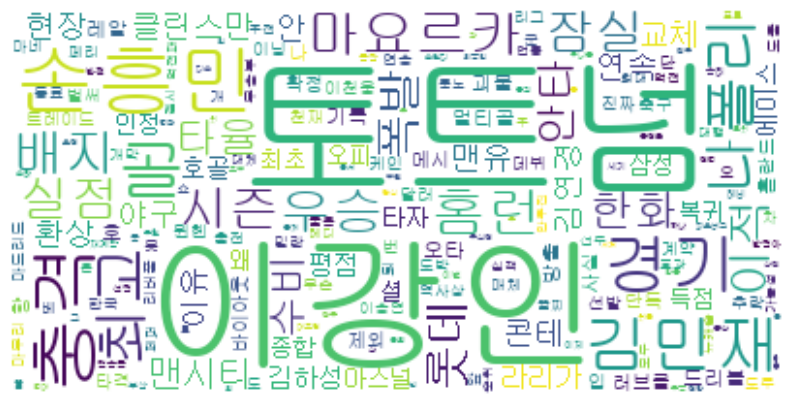

In [103]:
wc = WordCloud(
    background_color='white',
    random_state=2023,
    font_path='C:/Windows/Fonts/NGULIM.TTF'
).generate_from_frequencies(dict(news.vocab().most_common(300)))

plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

plt.show()

In [104]:


mask = np.array(Image.open('data/sport.jpg'))

image_colors = ImageColorGenerator(mask)

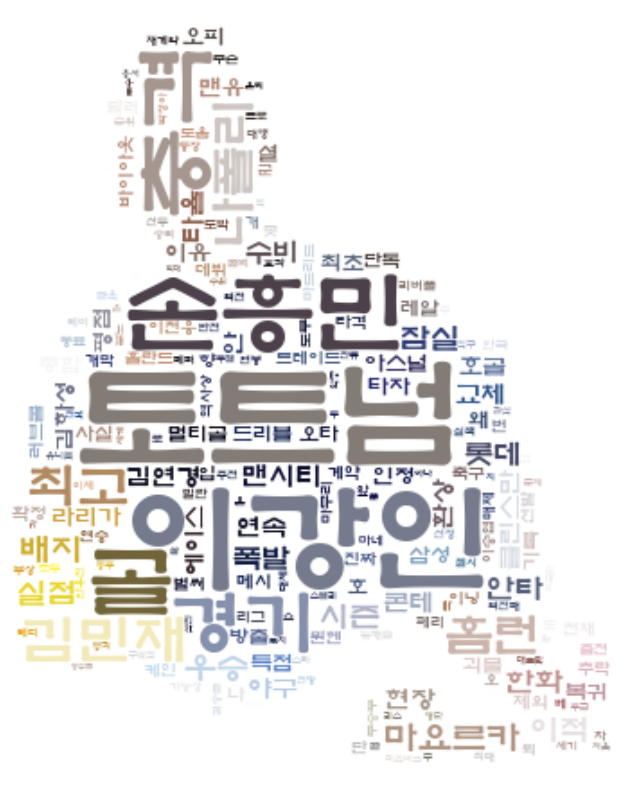

In [105]:
wc = WordCloud(
    background_color='white',
    random_state=2023,
    font_path='C:/windows/Fonts/HMFMOLD.TTF',
    # relative_scaling=0.2,
    mask=mask
).generate_from_frequencies(dict(news.vocab().most_common(300)))

plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

#### 2. 네이버 스포츠 종목별로 최신뉴스 목록에서 제목 가져오기

- 스포츠 종목별로 모아보기

In [120]:
base_url = 'https://sports.news.naver.com/index'
driver = webdriver.Chrome(driver_name)

# 네이버 스포츠 MainPage
url = base_url
driver.get(url)
time.sleep(1)

lis = driver.find_elements(By.CLASS_NAME, 'link_lnb')


# 야구, 해외야구, 축구, 해외축구, 농구, 배구, 골프, 일반
events = []
for li in lis[1:9]:
    events.append(li.get_attribute('href').replace('index', 'news/index?isphoto=N'))
#######################################################

# # 종목별 최신뉴스 URL 가져오기
# newss = []
# for event in events:
#     driver.get(event)
#     time.sleep(2)
    
#     curs = driver.find_elements(By.CSS_SELECTOR, '#lnb_sub_list > li > a')
#     if curs:
#         newss.append(curs[0].get_attribute('href'))
        
#######################################################

# 종목별 최신뉴스에서 개수 가져오기
news_list = {}
for news in events:
    driver.get(news)
    time.sleep(2)

    # 다음 버튼을 찾기
    next_clicked = 0    
    page_num = 0
    while True:

        try:
            page = driver.find_element(By.CSS_SELECTOR, '#_pageList > .next')
            page.click()

            next_clicked += 1   
            time.sleep(3)

        except:
            page = driver.find_elements(By.CSS_SELECTOR, '#_pageList > a')
            page_num += (len(page) + next_clicked * 10) if next_clicked > 0 else (len(page) + 1)
            break
    
    news_list[news]= page_num
#######################################################



In [121]:
sports_title = ''
for url_info, pages in news_list.items():
    for page_number in range(1, pages+1):
        url = f'{url_info}&page={page_number}'
        driver.get(url)
        time.sleep(2)

        titles = driver.find_elements(By.CSS_SELECTOR, '#_newsList > ul > li > .text > a > span ')
        
        for title in titles:
            sports_title += title.text.strip() + '\n'

driver.close()

In [118]:
len(sports_title.split('\n'))

1

In [109]:
# Okt nouns 를 하면 영문 숫자 모두 제거한다.
okt = Okt()
tokens = okt.nouns(sports_title)
len(tokens)

12377

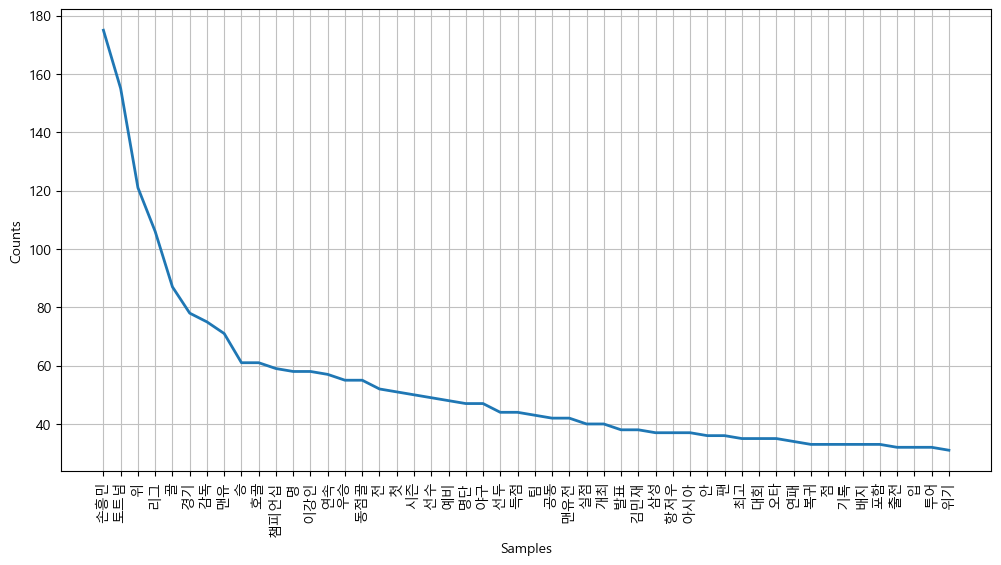

In [110]:
contents = nltk.Text(tokens)
plt.figure(figsize=(12,6))
contents.plot(50)
plt.show()

In [111]:
stoptext = """
    위 호골 골 승 명 전 시즌 첫 팀 개최 발표 안 팬 점 기록 포함 오타 입 환 호 것
"""
stop_words = stoptext.split()
tokens = [ word for word in tokens if word not in stop_words]


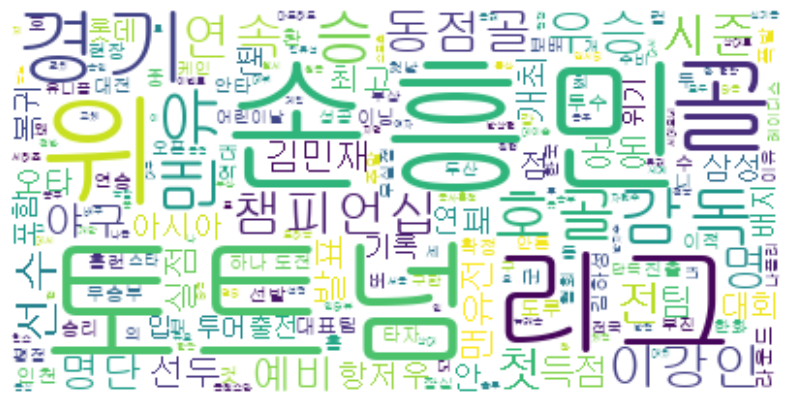

In [112]:
wc = WordCloud(
    background_color='white',
    random_state=2023,
    font_path='C:/windows/Fonts/NGULIM.TTF'
).generate_from_frequencies(dict(contents.vocab().most_common(300)))

plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

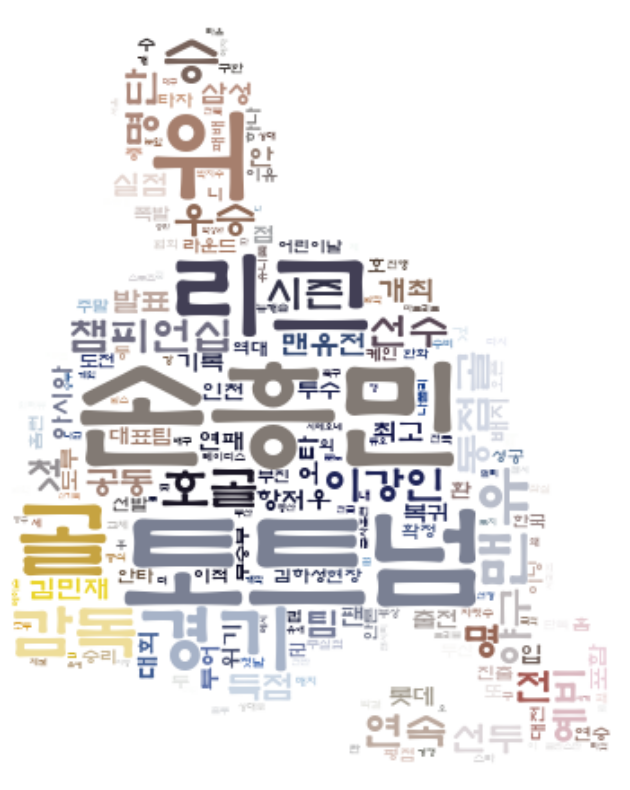

In [113]:
mask = np.array(Image.open('data/sport.jpg'))

image_colors = ImageColorGenerator(mask)

wc = WordCloud(
    background_color='white',
    random_state=2023,
    font_path='C:/windows/Fonts/HMFMOLD.TTF',
    mask=mask
).generate_from_frequencies(dict(contents.vocab().most_common(300)))

plt.figure(figsize=(10, 10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()